In [7]:
using Distributions, TimeIt, ProgressMeter, PyPlot, JLD
include("/home/postdoc/dsen/Desktop/G-ZZ/jl_files/zz_samplers.jl")

GibbsHMC (generic function with 1 method)

In [5]:
mb_size = 10
mb_size_list = 2*(1:10)
lambda = 1e0
lambda_list = logspace(-2,1,10)

n_groups, group_size = 5, 100
Nobs = group_size*n_groups
dim_cov = 5
dim_total = 1+n_groups+dim_cov;

In [10]:
fig = figure("pyplot_barplot",figsize=(12,4))
n_samples = 10^4
maxlag = 100
discard = 50_000
iacts_lambda = zeros(10)
iacts_mb = zeros(10)
for j in 1:2 
    for i in 1:5
        k = (j-1)*5+i
        filename  = "/xtmp/GZZ_data/mixed_effects/lambda:"*string(lambda_list[k])*
        "-dim_cov:"*string(dim_cov)*"-n_groups:"*string(n_groups)*
        "-Nobs:"*string(Nobs)*"-mb_size:"*string(mb_size)*".jld"
        xt_skel, bt_skel = load(filename, "xt_skeleton", "bt_skeleton")
        xi_samples = extract_samples(xt_skel[:,discard+1:end], 
                                     bt_skel[:,discard+1:end], 
                                    (bt_skel[end]-bt_skel[discard])/n_samples,
                                    "linear")[:,1:end-1];
        iacts_lambda[k] = maximum([sum(acf(xi_samples[dim,:],maxlag)) for dim in 1:size(xi_samples,1)])
        
        filename  = "/xtmp/GZZ_data/mixed_effects/lambda:"*string(lambda)*
        "-dim_cov:"*string(dim_cov)*"-n_groups:"*string(n_groups)*
        "-Nobs:"*string(Nobs)*"-mb_size:"*string(mb_size_list[k])*".jld"
        xt_skel, bt_skel = load(filename, "xt_skeleton", "bt_skeleton")
        xi_samples = extract_samples(xt_skel[:,discard+1:end], 
                                     bt_skel[:,discard+1:end], 
                                    (bt_skel[end]-bt_skel[discard])/n_samples,
                                    "linear")[:,1:end-1];
        iacts_mb[k] = maximum([sum(acf(xi_samples[dim,:],maxlag)) for dim in 1:size(xi_samples,1)])
        xt_skel, bt_skel, xi_samples = [], [], []
        gc()
    end
end

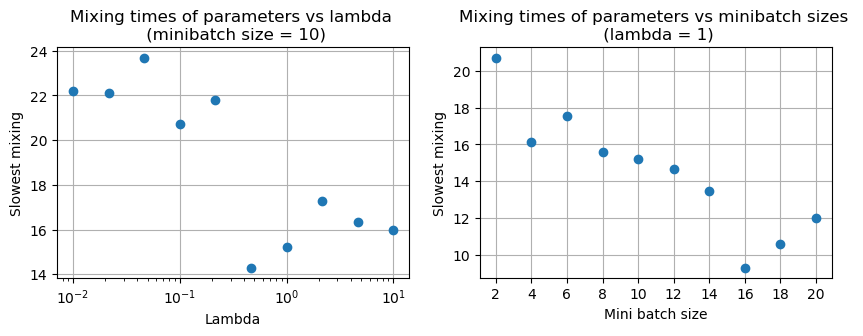

In [17]:
fig = figure("pyplot_barplot",figsize=(10,3))
subplot(121)
fig = figure("pyplot_barplot",figsize=(4,2.5))
plot(lambda_list, iacts_lambda, "o");
grid(true)
xscale("log")
xlabel("Lambda")
ylabel("Slowest mixing")
title("Mixing times of parameters vs lambda \n (minibatch size = 10)")
subplot(122)
plot(mb_size_list, iacts_mb, "o");
grid(true)
xticks(mb_size_list)
xlabel("Mini batch size")
ylabel("Slowest mixing")
title("Mixing times of parameters vs minibatch sizes \n (lambda = 1)");
savefig("/home/postdoc/dsen/Desktop/G-ZZ/plots/mixing_mixed_effects.pdf", 
    format="pdf", dpi=1000, bbox_inches="tight")